In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

L, H = 100, 100 # м
N = [60, 120, 240, 480, 960]
nx = N[1]
ny = nx
dx = L / nx
D0 = 1.0  # м^2/с
D1 = 0.01
dt = 0.001 # For N = 960 was used dt = 0.001 but for N != 960 was used dt = 0.006
tmax = 600.0
it_max = int(tmax / dt)
def get_derivative_of_q(dt, number_of_source, t):
    teta = [43, 77]
    p = [100, 100]
    return p[number_of_source] * (np.sin(2*math.pi * t/teta[number_of_source]) + 1)

(0.0, 120.0, 0.0, 120.0)

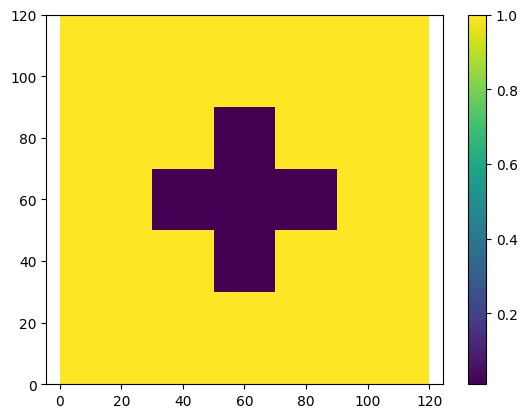

In [3]:
Dij = np.full((ny, nx), D0)

Dij[nx//4:3*nx//4, 5*nx//12:7*nx//12] = D1
Dij[5*nx//12:7*nx//12, nx//4:3*nx//4] = D1

plt.pcolormesh(Dij)
plt.colorbar()
plt.axis('equal')
#Изображение матрицы коэффициентов диффузии

In [4]:
def boundary_conditions(T: np.ndarray):
    """
    Absolute heat insulation
    """
    T[:, -1] = T[:, -2]
    T[:, :, -1] = T[:, :, -2]
    """
    Fixed temperature
    """
    T[:, 0] = 0
    T[:, :, 0] = 0

In [ ]:
def heat_source(T: np. ndarray,
                x: int,
                y: int,
                h: int,
                w: int,
                derivative_of_q: float,
                dt: float
               ):
    T[:, y:y+h, x:x+w] += derivative_of_q * dt

In [5]:

h_first_heat = 4*nx // 12
w_first_heat = nx // 12
x_first_heat = nx // 12
y_first_heat = 4*nx // 12

h_second_heat = nx // 12
w_second_heat = 4*nx // 12
x_second_heat = 4*nx // 12
y_second_heat = nx // 12


x_y_of_probes = np.zeros((4,2), dtype=int)

x_y_of_probes[0] = np.array([4*nx//12, 4*nx//12])
x_y_of_probes[1] = np.array([8*nx//12, 4*nx//12])
x_y_of_probes[2] = np.array([8*nx//12, 8*nx//12])
x_y_of_probes[3] = np.array([4*nx//12, 8*nx//12])
